In [219]:
import pandas as pd
import numpy as np
import numpy.linalg as la
from scipy.linalg import svd
import matplotlib.pyplot as plt
import math



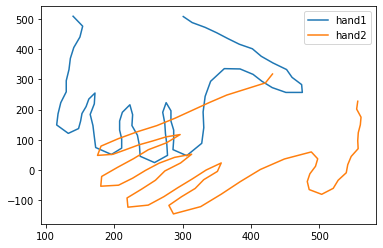

In [220]:
hand1 = pd.read_csv(r"C:\Users\camda\OneDrive\VSdataFundamentals\data\hand1.dat",header=None)
hand2 = pd.read_csv(r"C:\Users\camda\OneDrive\VSdataFundamentals\data\hand2.dat",header=None)
plt.plot(hand1[0],hand1[1], label = "hand1")
plt.plot(hand2[0],hand2[1], label = "hand2")
plt.legend()
plt.show()



In [239]:

x = hand1.transpose()
test = x @ hand2
U, s, VT = svd(test)
#print(VT)

R = VT @ U
#print(R)
angle = np.arcsin(R[0][1])
print(f"2B. The angle of rotation is {angle}")

2B. The angle of rotation is 0.6321963814976147


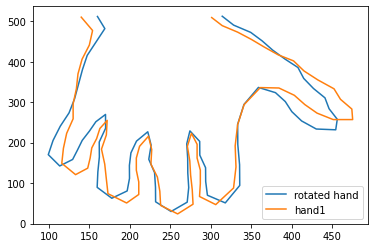

2C. The two hands do align with each other.


In [222]:

z = hand2 @ R
plt.plot(z[0],z[1],label="rotated hand")
plt.plot(hand1[0],hand1[1], label = "hand1")
plt.legend()
plt.show()
print("2C. The two hands do align with each other.")

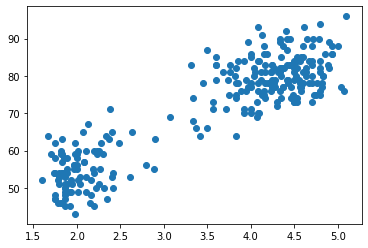

2A. There appears to be a positive strong relationship as the points seem to be clustered around a line in the positive direction.


In [223]:
dat = pd.read_csv(r"C:\Users\camda\OneDrive\VSdataFundamentals\data\faithful.csv")
#print(dat)
x = dat['eruptions']
y = dat['waiting']
plt.scatter(x,y)
plt.show()
print("2A. There appears to be a positive strong relationship as the points seem to be clustered around a line in the positive direction.")

In [224]:

x_mean = np.mean(x)
y_mean = np.mean(y)
print(f"2B. The mean of eruption time {x_mean} and the the mean of the waiting time is {y_mean}")

2B. The mean of eruption time 3.4877830882352936 and the the mean of the waiting time is 70.8970588235294


In [225]:

centered_x = []
centered_y = []
for i in range(len(x)):
    centered_x.append(x[i] - x_mean)
    centered_y.append(y[i] - y_mean)
    
#print(centered_x)
#print(centered_y)

centered_x = pd.DataFrame(centered_x)
centered_y = pd.DataFrame(centered_y)
dot = np.dot(centered_x[0],centered_y[0])
std = np.std(x) * np.std(y)

coefficient = (dot/std) * (1/len(x))
print(f"2C. the coefficient is {coefficient} which indicates a strong positive relationship. \n This number aligns with the scatterplot that was produced above.")

2C. the coefficient is 0.9008111683218132 which indicates a strong positive relationship. 
 This number aligns with the scatterplot that was produced above.


10.729641395133527
33.47439702275335


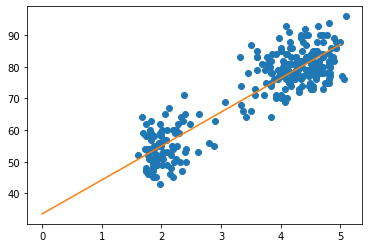

2D. The alpha value is 33.47439702275335 and the beta value is 10.729641395133527. The sign and value 
 of the slope align with the correlation because it is a postive value and there is a strong 
 relationship so there is clear relationship present. 


In [229]:
beta = np.dot(centered_x[0],centered_y[0])/np.dot(centered_x[0],centered_x[0])
print(beta)
alpha = y_mean - x_mean * beta
print(alpha)
plt.scatter(x,y)
plt.plot(alpha + beta)

testx = np.linspace(0,5,272)
testy =  alpha + beta* testx
plt.plot(testx,testy)
plt.show()

print(f"2D. The alpha value is {alpha} and the beta value is {beta}. The sign and value \n of the slope align with the correlation because it is a postive value and there is a strong \n relationship so there is clear relationship present. ")

In [227]:
qd = alpha + 2.2 * beta
print(f"2E. Based on a time of eruption of 2.2 minutes an expected value of {qd}")

2E. Based on a time of eruption of 2.2 minutes an expected value of 57.07960809204711


In [228]:
predyvalue = alpha + beta * x

# Calculate the sum of squared residuals
SSres = np.sum(pow((y - predyvalue),2))

# Calculate the total sum of squares
SStot = np.sum(pow((y - y_mean),2))

# Calculate the R2 statistic
rsquared = 1 - SSres / SStot

print(f"2F. Rsquared = {rsquared}")

2F. Rsquared = 0.8114607609733095
